In [17]:
import cv2
import os
import sys
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image 
from IPython.display import display
from IPython.display import Image as _Imgdis
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, MaxPooling2D, Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
cap = cv2.VideoCapture('Desktop/video_1.mp4')
succes, image = cap.read()
try:
    if not os.path.exists('Desktop/data/'):
        os.makedirs('Desktop/data/')
except OSError:
    print("Error : Creating directory")

In [18]:
currentFrame = 0
success=True
while success:
    cv2.imwrite('Desktop/data/'+"Frame%d.jpg"%currentFrame, image)
    success , image = cap.read()
    print('creating....'+"Frame%d.jpg"%currentFrame)
    currentFrame+=1

creating....Frame0.jpg
creating....Frame1.jpg
creating....Frame2.jpg
creating....Frame3.jpg
creating....Frame4.jpg
creating....Frame5.jpg
creating....Frame6.jpg
creating....Frame7.jpg
creating....Frame8.jpg
creating....Frame9.jpg
creating....Frame10.jpg
creating....Frame11.jpg
creating....Frame12.jpg
creating....Frame13.jpg
creating....Frame14.jpg
creating....Frame15.jpg
creating....Frame16.jpg
creating....Frame17.jpg
creating....Frame18.jpg
creating....Frame19.jpg
creating....Frame20.jpg
creating....Frame21.jpg
creating....Frame22.jpg
creating....Frame23.jpg
creating....Frame24.jpg
creating....Frame25.jpg
creating....Frame26.jpg
creating....Frame27.jpg
creating....Frame28.jpg
creating....Frame29.jpg
creating....Frame30.jpg
creating....Frame31.jpg
creating....Frame32.jpg
creating....Frame33.jpg
creating....Frame34.jpg
creating....Frame35.jpg
creating....Frame36.jpg
creating....Frame37.jpg
creating....Frame38.jpg
creating....Frame39.jpg
creating....Frame40.jpg
creating....Frame41.jpg
cr

creating....Frame340.jpg
creating....Frame341.jpg
creating....Frame342.jpg
creating....Frame343.jpg
creating....Frame344.jpg
creating....Frame345.jpg
creating....Frame346.jpg
creating....Frame347.jpg
creating....Frame348.jpg
creating....Frame349.jpg
creating....Frame350.jpg
creating....Frame351.jpg
creating....Frame352.jpg
creating....Frame353.jpg
creating....Frame354.jpg
creating....Frame355.jpg
creating....Frame356.jpg
creating....Frame357.jpg
creating....Frame358.jpg
creating....Frame359.jpg
creating....Frame360.jpg
creating....Frame361.jpg
creating....Frame362.jpg
creating....Frame363.jpg
creating....Frame364.jpg
creating....Frame365.jpg
creating....Frame366.jpg
creating....Frame367.jpg
creating....Frame368.jpg
creating....Frame369.jpg
creating....Frame370.jpg
creating....Frame371.jpg
creating....Frame372.jpg
creating....Frame373.jpg
creating....Frame374.jpg
creating....Frame375.jpg
creating....Frame376.jpg
creating....Frame377.jpg
creating....Frame378.jpg
creating....Frame379.jpg


creating....Frame668.jpg
creating....Frame669.jpg
creating....Frame670.jpg
creating....Frame671.jpg
creating....Frame672.jpg
creating....Frame673.jpg
creating....Frame674.jpg
creating....Frame675.jpg
creating....Frame676.jpg
creating....Frame677.jpg
creating....Frame678.jpg
creating....Frame679.jpg
creating....Frame680.jpg
creating....Frame681.jpg
creating....Frame682.jpg
creating....Frame683.jpg
creating....Frame684.jpg
creating....Frame685.jpg
creating....Frame686.jpg
creating....Frame687.jpg
creating....Frame688.jpg
creating....Frame689.jpg
creating....Frame690.jpg
creating....Frame691.jpg
creating....Frame692.jpg
creating....Frame693.jpg
creating....Frame694.jpg
creating....Frame695.jpg
creating....Frame696.jpg
creating....Frame697.jpg
creating....Frame698.jpg
creating....Frame699.jpg
creating....Frame700.jpg
creating....Frame701.jpg
creating....Frame702.jpg
creating....Frame703.jpg
creating....Frame704.jpg
creating....Frame705.jpg
creating....Frame706.jpg
creating....Frame707.jpg


creating....Frame1000.jpg
creating....Frame1001.jpg
creating....Frame1002.jpg
creating....Frame1003.jpg
creating....Frame1004.jpg
creating....Frame1005.jpg
creating....Frame1006.jpg
creating....Frame1007.jpg
creating....Frame1008.jpg
creating....Frame1009.jpg
creating....Frame1010.jpg
creating....Frame1011.jpg
creating....Frame1012.jpg
creating....Frame1013.jpg
creating....Frame1014.jpg
creating....Frame1015.jpg
creating....Frame1016.jpg
creating....Frame1017.jpg
creating....Frame1018.jpg
creating....Frame1019.jpg
creating....Frame1020.jpg
creating....Frame1021.jpg
creating....Frame1022.jpg
creating....Frame1023.jpg
creating....Frame1024.jpg
creating....Frame1025.jpg
creating....Frame1026.jpg
creating....Frame1027.jpg
creating....Frame1028.jpg
creating....Frame1029.jpg
creating....Frame1030.jpg
creating....Frame1031.jpg
creating....Frame1032.jpg
creating....Frame1033.jpg
creating....Frame1034.jpg
creating....Frame1035.jpg
creating....Frame1036.jpg
creating....Frame1037.jpg
creating....

In [19]:
cap.release()
cv2.destroyAllWindows()

Frame10.jpg


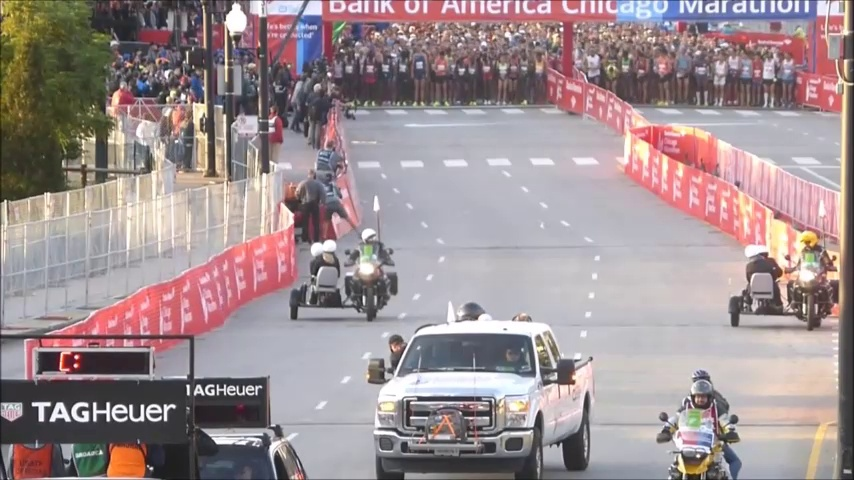

Frame100.jpg


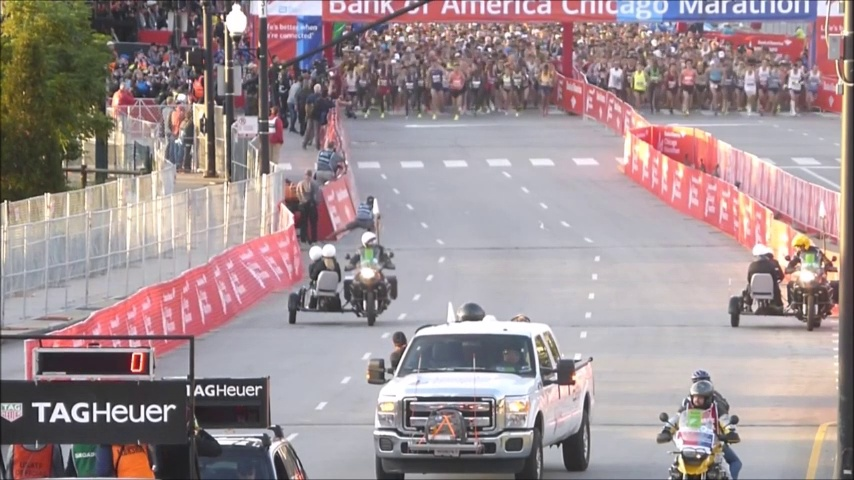

Frame1000.jpg


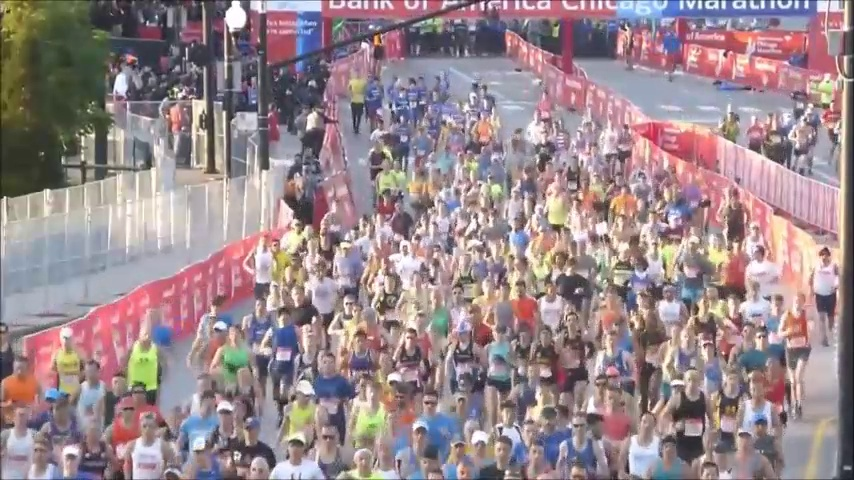

Frame1001.jpg


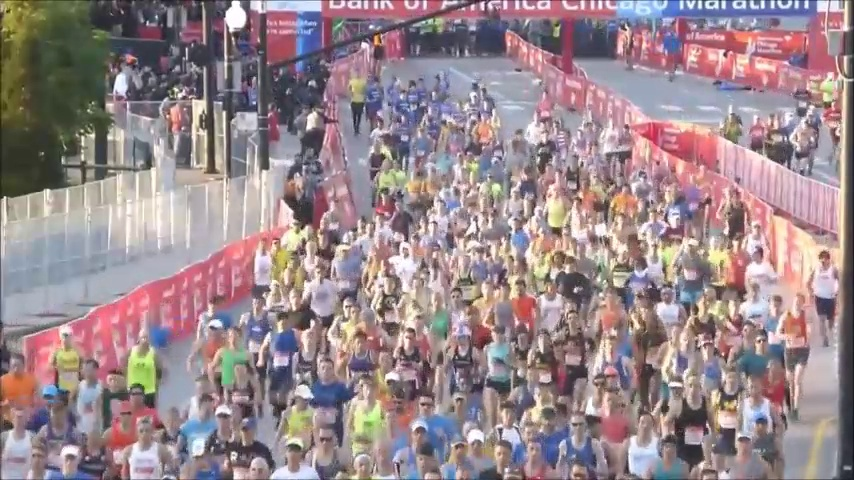

Frame1002.jpg


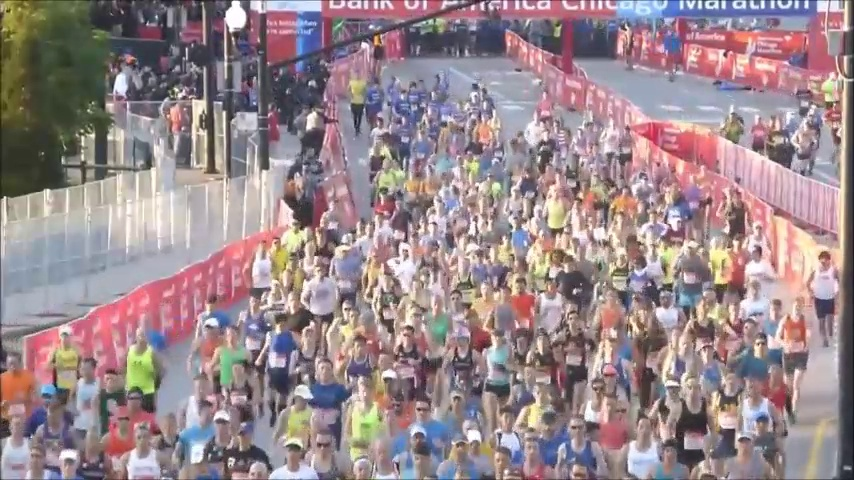

Frame1003.jpg


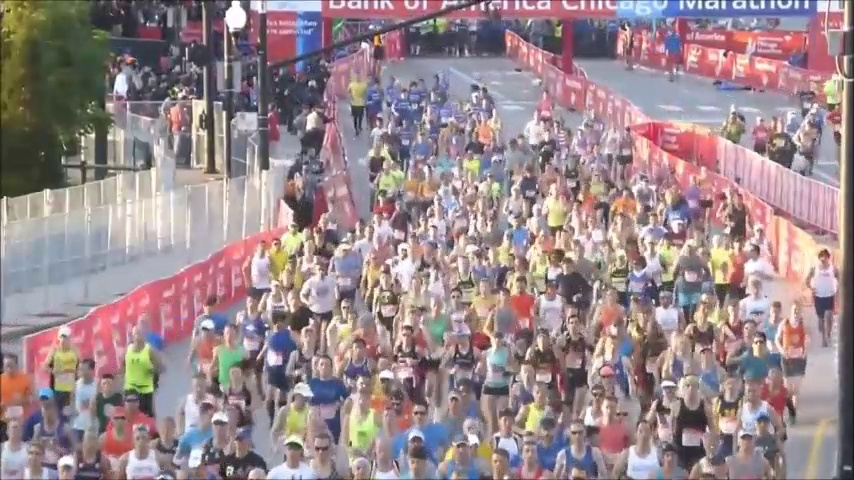

Frame1004.jpg


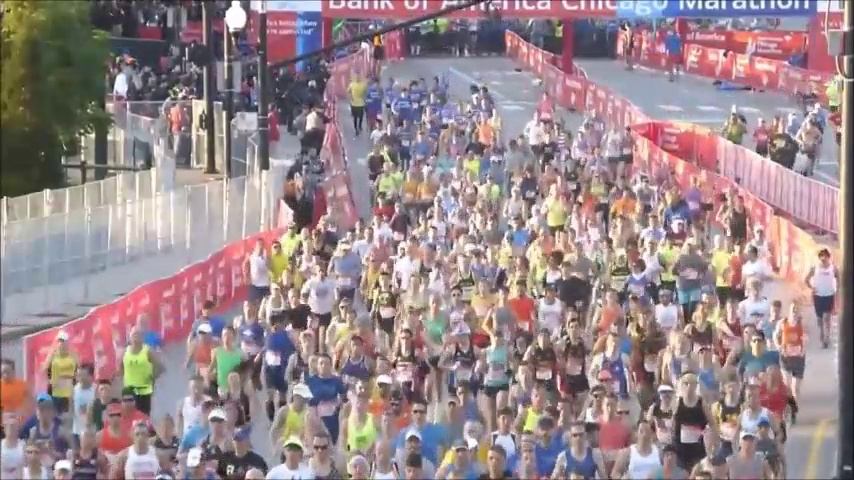

Frame1005.jpg


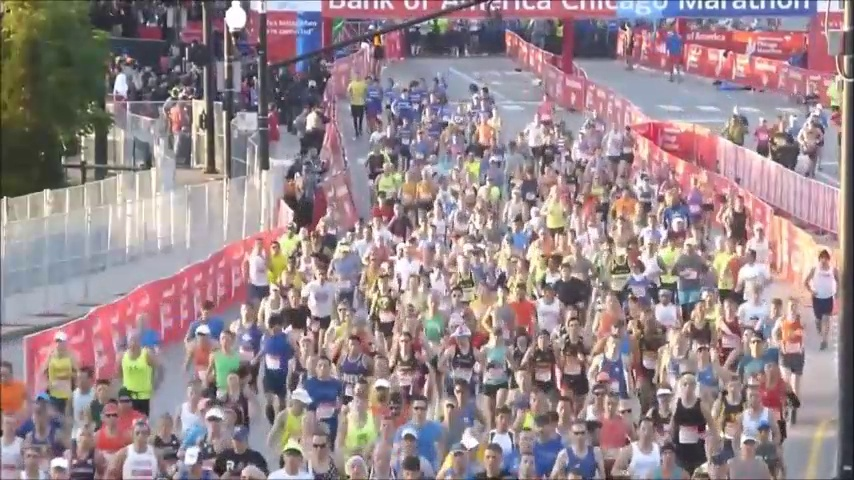

In [36]:
folder = "Desktop/data/"
files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder,f))]
for i in range(2,10):
    print(files[i])
    display(_Imgdis(filename = folder + "/" + files[i],width=240, height=320))

#plt.imshow('Desktop/data/Frame0.jpg')
#plt.show()

In [8]:
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),input_shape = (64,64,3),activation = 'relu'))

In [9]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
classifier.add(Flatten())

In [11]:
classifier.add(Dense(units = 128, activation = 'relu'))

In [12]:
classifier.add(Dense(units=1, activation='sigmoid'))

In [27]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2,horizontal_flip=0.2)

In [29]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [38]:
training_set = train_datagen.flow_from_directory('Desktop/data/Train/', target_size = (64,64),batch_size = 50, class_mode='binary')

Found 767 images belonging to 2 classes.


In [42]:
test_set=test_datagen.flow_from_directory('Desktop/data/Test/',target_size=(64,64),batch_size=50, class_mode='binary')

Found 489 images belonging to 2 classes.


In [43]:
classifier.fit_generator(training_set, steps_per_epoch =767, epochs = 2, validation_data = test_set, validation_steps = 489)

Epoch 1/2
767/767 [==============================] - 936s 1s/step - loss: 5.2230e-05 - acc: 1.0000 - val_loss: 0.4625 - val_acc: 0.9202
Epoch 2/2
767/767 [==============================] - 900s 1s/step - loss: 1.6945e-05 - acc: 1.0000 - val_loss: 0.5235 - val_acc: 0.9202


In [73]:
test_image=image.load_img('Desktop/data/Test/No_crowd/Frame287.jpg',target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image)
training_set.class_indices
if result[0][0]==0:
    prediction='Crowd'
    print(prediction)
else:
    prediction='No crowd'
    print(prediction)

No crowd


In [56]:
print(training_set.class_indices)

{'Crowd': 0, 'No_crowd': 1}
